## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train.shape

(50000, 3072)

In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 81s 2ms/step - loss: 2.1128 - acc: 0.2021 - val_loss: 1.9047 - val_acc: 0.3011
Epoch 2/100
50000/50000 [==============================] - 73s 1ms/step - loss: 1.8273 - acc: 0.3322 - val_loss: 1.7616 - val_acc: 0.3523
Epoch 3/100
50000/50000 [==============================] - 73s 1ms/step - loss: 1.7265 - acc: 0.3730 - val_loss: 1.6827 - val_acc: 0.3922
Epoch 4/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.6317 - acc: 0.4146 - val_loss: 1.6762 - val_acc: 0.4019
Epoch 5/100
50000/50000 [==============================] - 76s 2ms/step - loss: 1.5727 - acc: 0.4343 - val_loss: 1.6129 - val_acc: 0.4258
Epoch 6/100
50000/50000 [==============================] - 64s 1ms/step - loss: 1.5220 - acc: 0.4548 - val_loss: 1.6170 - val_acc: 0.4258
Epoch 7/100
50000/50000 [==============================] - 62s 1ms/step - 

Epoch 58/100
50000/50000 [==============================] - 61s 1ms/step - loss: 0.6018 - acc: 0.7825 - val_loss: 1.9790 - val_acc: 0.5143
Epoch 59/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5681 - acc: 0.7961 - val_loss: 1.9865 - val_acc: 0.5096
Epoch 60/100
50000/50000 [==============================] - 56s 1ms/step - loss: 0.5523 - acc: 0.8031 - val_loss: 2.0801 - val_acc: 0.5200
Epoch 61/100
50000/50000 [==============================] - 51s 1ms/step - loss: 0.5544 - acc: 0.8006 - val_loss: 2.0804 - val_acc: 0.5053
Epoch 62/100
50000/50000 [==============================] - 51s 1ms/step - loss: 0.5208 - acc: 0.8127 - val_loss: 2.0726 - val_acc: 0.5174
Epoch 63/100
50000/50000 [==============================] - 50s 1ms/step - loss: 0.5119 - acc: 0.8165 - val_loss: 2.1808 - val_acc: 0.5041
Epoch 64/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.5189 - acc: 0.8135 - val_loss: 2.1467 - val_acc: 0.5066
Epoch 65/100
50000/50000 [=

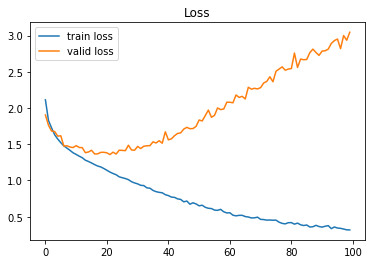

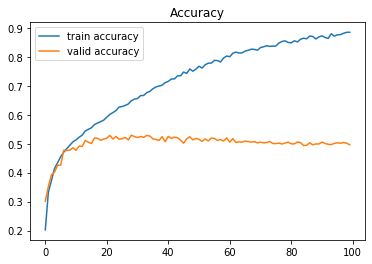

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()